# Mapping
***


This is an exploration of mapping using Python and various libraries for mapping.

In [21]:
# import geopandas library
import geopandas as gpd

In [22]:
# define the path to the shapefile
shape = "./geospatial_files/IRL_adm1.shp"

Note that both the .shp file and the .shx file have to be in the same directory. It won't work with only the shp file. What is the shx file?

In [23]:
# read in shapefiles with geopandas
sf = gpd.read_file(shape)

<Axes: >

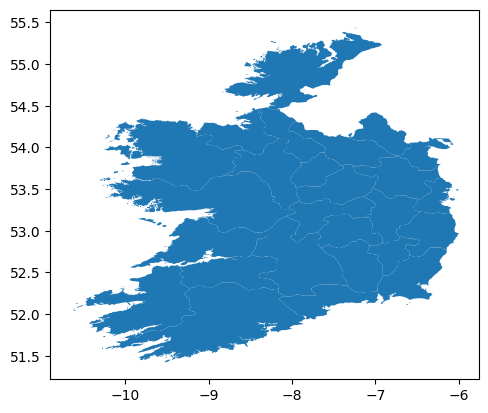

In [24]:
# plot the shapefile
sf.plot()

Maybe we could read in some data and plot that on the map. I'd like to get plot the location of every hospital in Ireland. I created a csv file containing the latitude and longitude of each hospital. We can load the dataset using Pandas.

In [25]:
# import pandas library
import pandas as pd

In [26]:
# read in csv dataset using pandas and create a dataframe
df = pd.read_csv("ire_hospitals.csv")

Now that the dataset is loaded, we can do some stuff.

In [27]:
# view a small version of the dataframe
df

,name,lat,lon
0,Children's Health Ireland,53.326179,-6.318904
1,Naas General Hospital,53.211413,-6.661404
2,Midland Regional Hospital Portlaoise,53.037821,-7.275367
3,Midland Regional Hospital Tullamore,53.283128,-7.488550
4,St. James's Hospital,53.340097,-6.295563
5,Tallaght University Hospital,53.291193,-6.378828
6,St. Columcille's Hospital,53.242354,-6.132517
7,Midland Regional Hospital Mullingar,53.534411,-7.349006
8,Our Lady's Hospital Navan,53.650193,-6.698165
9,St. Luke's General Hospital Kilkenny,52.666460,-7.262816


If we want to plot those points on the map generated earlier wit geopandas, we have to convert the pandas dataframe containing the hospital information into points.
We can use geopandas to convert "lat" and "lon" in the dataframe to points.

In [28]:
# this gives us a new "geodataframe"
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.lon, df.lat))

<Axes: >

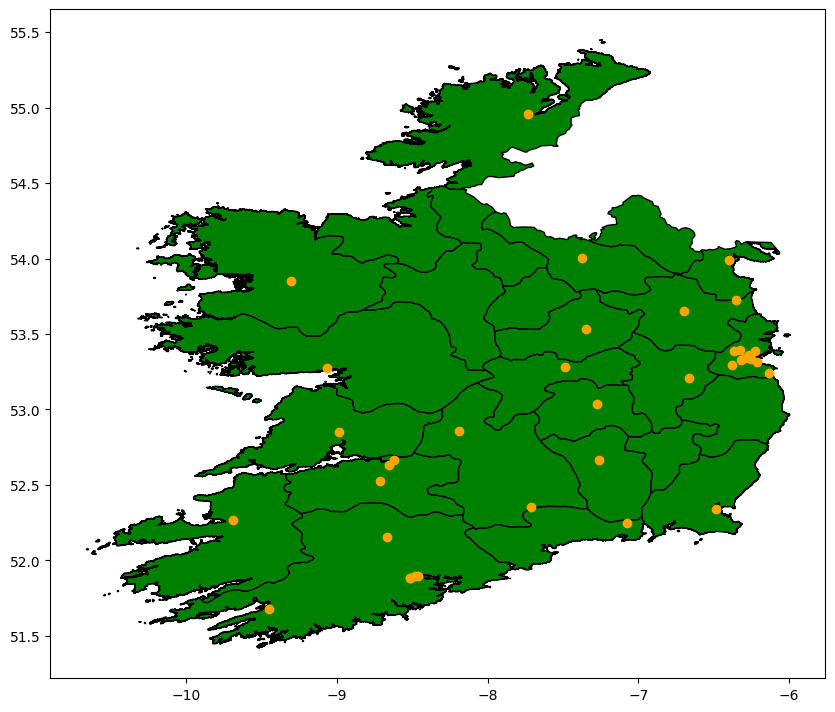

In [29]:
# import matplotlib that can do subplots
import matplotlib.pyplot as plt

# create a figure and and axis for plotting on
fig, ax = plt.subplots(figsize=(10, 10))

# plot the shapefile
sf.plot(ax=ax, color='green', edgecolor='black')

# plot the GeoDataFrame
df_geo.plot(ax=ax, color='orange')

I'd like to color the sea blue.

<Axes: >

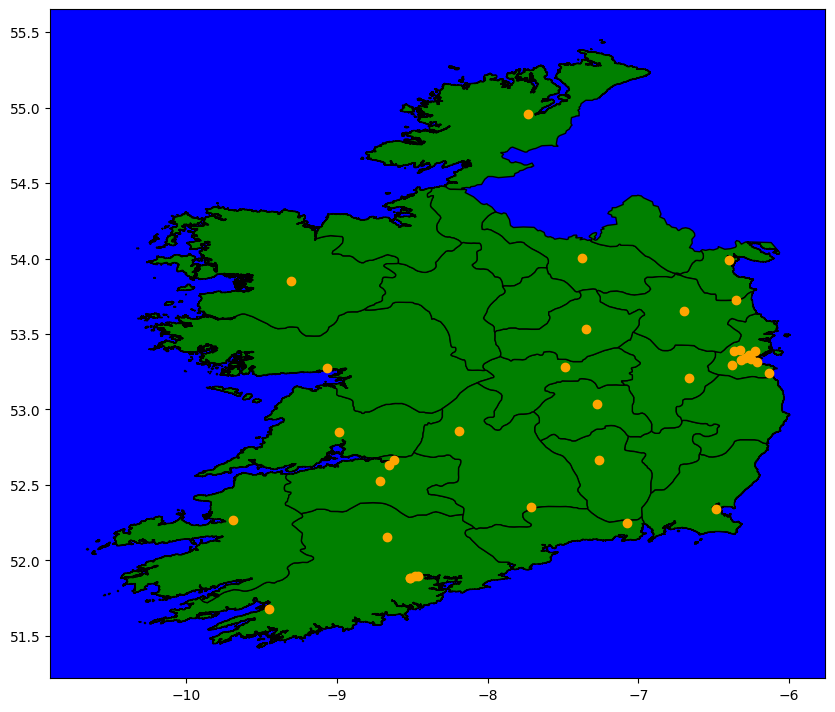

In [30]:
# create a figure and and axis for plotting on
fig, ax = plt.subplots(figsize=(10, 10))

# set the background color of the plot to blue
ax.set_facecolor('blue')

# plot the shapefile
sf.plot(ax=ax, color='green', edgecolor='black')

# plot the GeoDataFrame
df_geo.plot(ax=ax, color='orange')

Northern Ireland is missing. We need to find a shapefile for northern ireland and plot that as well.

<Axes: >

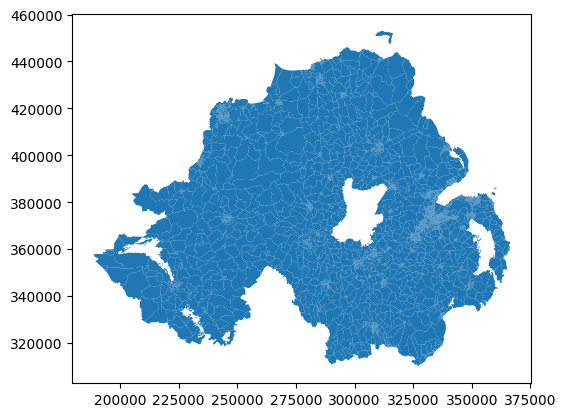

In [31]:
# define the path to the shapefile
shape_ni = "./geospatial_files/DZ2021.shp"

# read in shapefiles with geopandas
sf_ni = gpd.read_file(shape_ni)

sf_ni.plot()

How do we combine them?

<Axes: >

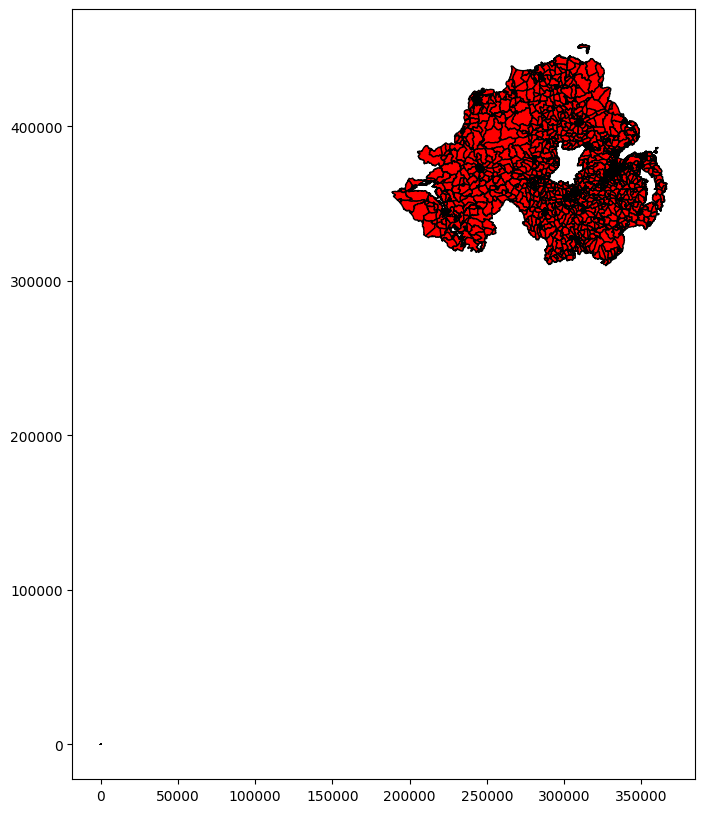

In [33]:
# Plot both shapefiles
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the first shapefile
sf.plot(ax=ax, color='green', edgecolor='black')

# Plot the second shapefile
sf_ni.plot(ax=ax, color='red', edgecolor='black')

Scale is messed up. I found a site that had all the counties already in one shapefile.

- https://www.townlands.ie/page/download/

<Axes: >

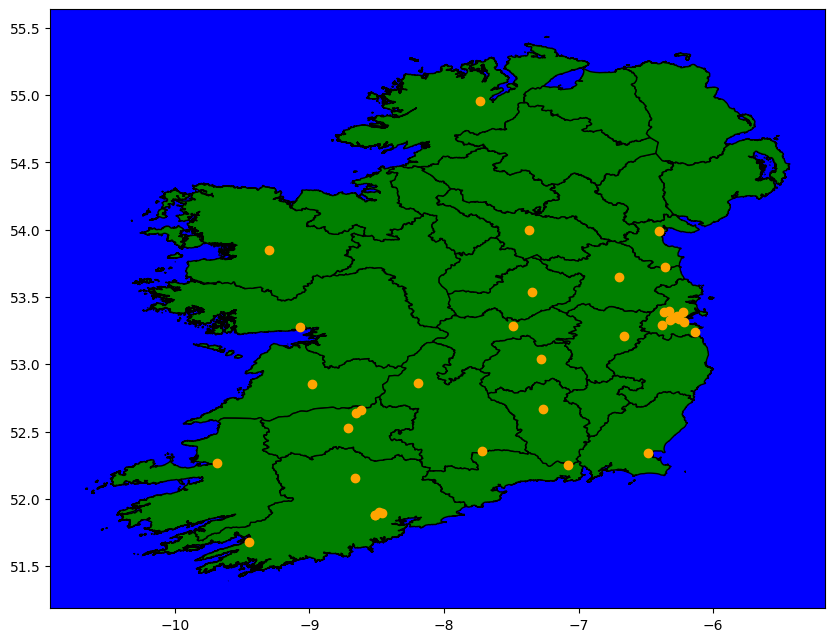

In [35]:
# define the path to the shapefile
shape_all_ire = "./geospatial_files/counties/counties.shp"

# read in shapefiles with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)


# create a figure and and axis for plotting on
fig, ax = plt.subplots(figsize=(10, 10))

# set the background color of the plot to blue
ax.set_facecolor('blue')

# plot the shapefile
sf_all_ire.plot(ax=ax, color='green', edgecolor='black')

# plot the GeoDataFrame
df_geo.plot(ax=ax, color='orange')